In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from parameters_dict import physics_parameters
from exp_analysis_class import exp_analysis

In [5]:
physics_parameters['heavy']

{'m4_limits': (0.005, 1),
 'mz_limits': (0.005, 10),
 'm4_scan': [0.01, 0.1, 0.5],
 'mz_scan': [0.01, 0.1, 1, 5],
 'alpha_dark': 0.4,
 'Umu4': 2.2e-07,
 'epsilon2': 0.00046,
 'alpha_em': 0.0072992700729927005,
 'Vmu4_alpha_epsilon2': 2.9547445255474454e-13}

In [6]:
case = 'heavy'
save_folder = ('../fig/control_checks/comparison_with_truth/' + case + '/')
!mkdir -p $save_folder
my_exp_analysis = exp_analysis(case)

/bin/bash: port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_port_used'
/bin/bash: wait_until_port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_wait_until_port_used'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_module'
/bin/bash: find_port: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_find_port'
/bin/bash: random_number: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_random_number'
/bin/bash: helmod: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_helmod'
/bin/bash: source_helpers: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_source_h

In [7]:
my_exp_analysis.load_df_base(1000000)

In [8]:
from scipy.stats import binned_statistic, binned_statistic_2d

def effective_sample_size(weights):
    return np.sum(weights)**2/np.sum(np.power(weights, 2))

def ratio_weighted_unweighted(weights):
    return np.sum(weights)/len(weights)

In [9]:
m4_values = my_exp_analysis.df_base['m4', '']
mz_values = my_exp_analysis.df_base['mzprime', '']
weight_decay_values = my_exp_analysis.df_base['weight_decay', '']
weight_values = my_exp_analysis.df_base['weight', '']

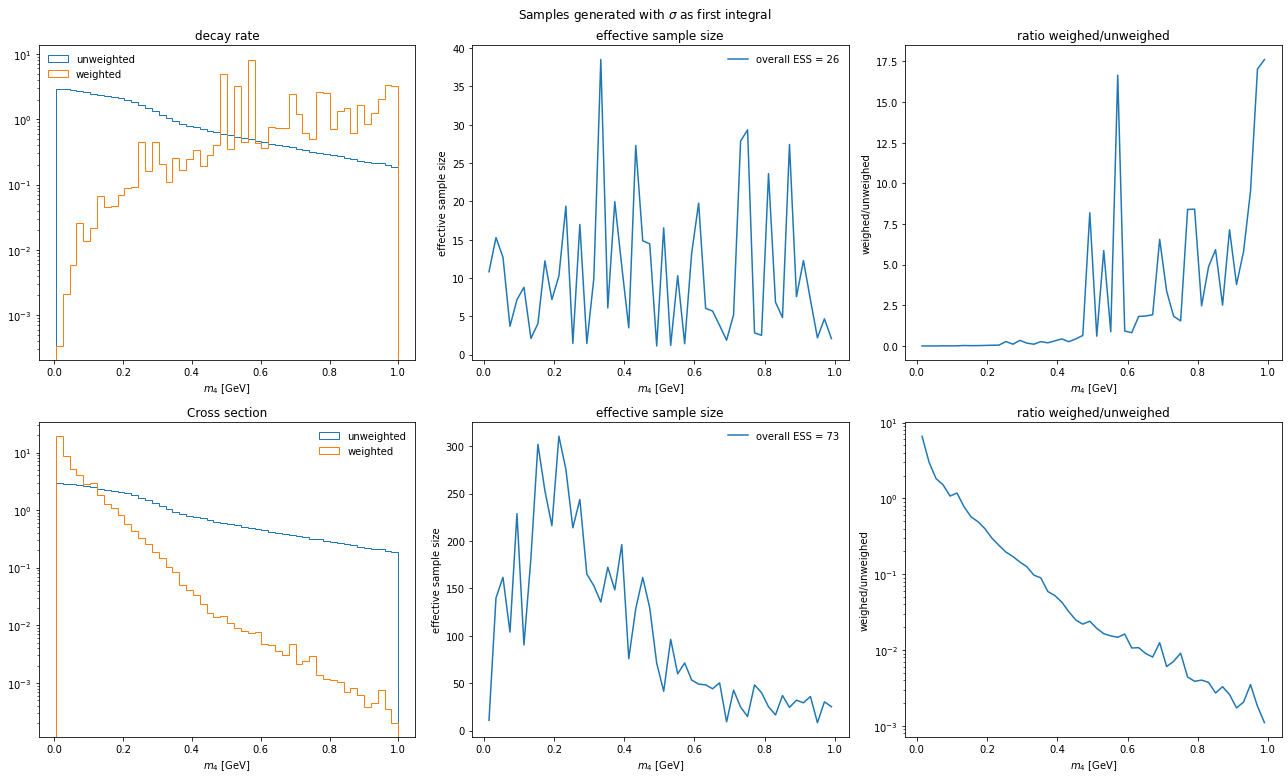

In [17]:
this_sample = m4_values
xlabel = r'$m_4$ [GeV]'
bins = 50

fig = plt.figure(figsize=[18, 11])
fig.suptitle(f'Samples generated with $\sigma$ as first integral')

plt.subplot(231)
plt.hist(this_sample, 
         density=True, 
         label='unweighted',
         histtype='step',
        bins=bins)
plt.hist(this_sample, 
         weights=weight_decay_values, 
         density=True, 
         label='weighted',
         histtype='step',
        bins=bins)
plt.legend(frameon=False, loc='upper left')
plt.title('decay rate')
plt.xlabel(xlabel)
plt.yscale('log')

plt.subplot(232)
result = binned_statistic(this_sample, weight_decay_values, 
                 statistic=effective_sample_size,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0], label=f'overall ESS = {effective_sample_size(weight_decay_values):.2g}')
plt.legend(frameon=False)
plt.xlabel(xlabel)
plt.ylabel('effective sample size')
plt.title('effective sample size')

plt.subplot(233)
result = binned_statistic(this_sample, weight_decay_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0]*len(weight_decay_values)/weight_decay_values.sum())
plt.xlabel(xlabel)
plt.ylabel('weighed/unweighed')
plt.title('ratio weighed/unweighed')



plt.subplot(234)
plt.hist(this_sample, 
         density=True, 
         label='unweighted',
         histtype='step',
        bins=bins)
plt.hist(this_sample, 
         weights=weight_values, 
         density=True, 
         label='weighted',
         histtype='step',
        bins=bins)
plt.legend(frameon=False, loc='upper right')
plt.title('Cross section')
plt.xlabel(xlabel)
plt.yscale('log')

plt.subplot(235)
result = binned_statistic(this_sample, weight_values, 
                 statistic=effective_sample_size,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0], label=f'overall ESS = {effective_sample_size(weight_values):.2g}')
plt.legend(frameon=False)
plt.xlabel(xlabel)
plt.ylabel('effective sample size')
plt.title('effective sample size')

plt.subplot(236)
result = binned_statistic(this_sample, weight_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0]*len(weight_values)/weight_values.sum())
plt.xlabel(xlabel)
plt.ylabel('weighed/unweighed')
plt.title('ratio weighed/unweighed')
plt.yscale('log')

plt.tight_layout()
plt.savefig(save_folder+'m4_weights.png', dpi=250)

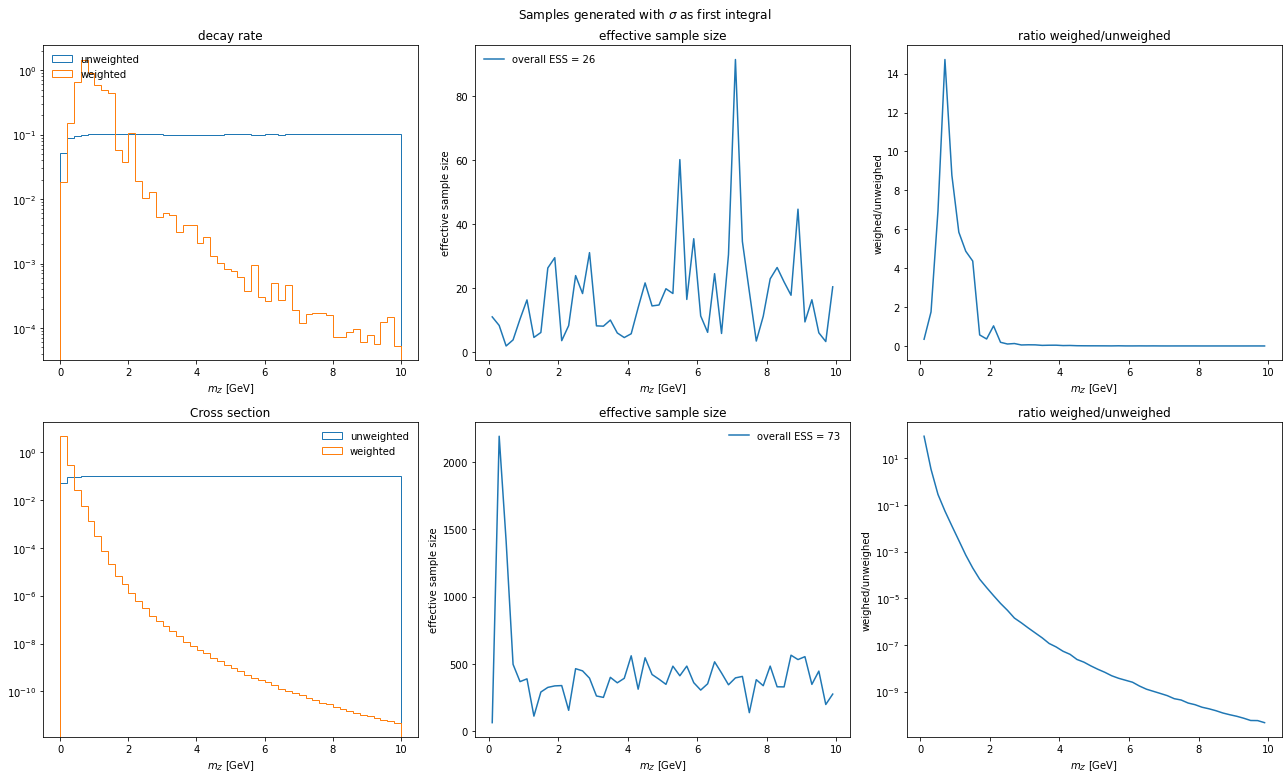

In [18]:
this_sample = mz_values
xlabel = r'$m_Z$ [GeV]'
bins = 50

fig = plt.figure(figsize=[18, 11])
fig.suptitle(f'Samples generated with $\sigma$ as first integral')

plt.subplot(231)
plt.hist(this_sample, 
         density=True, 
         label='unweighted',
         histtype='step',
        bins=bins)
plt.hist(this_sample, 
         weights=weight_decay_values, 
         density=True, 
         label='weighted',
         histtype='step',
        bins=bins)
plt.legend(frameon=False, loc='upper left')
plt.title('decay rate')
plt.xlabel(xlabel)
plt.yscale('log')

plt.subplot(232)
result = binned_statistic(this_sample, weight_decay_values, 
                 statistic=effective_sample_size,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0], label=f'overall ESS = {effective_sample_size(weight_decay_values):.2g}')
plt.legend(frameon=False)
plt.xlabel(xlabel)
plt.ylabel('effective sample size')
plt.title('effective sample size')

plt.subplot(233)
result = binned_statistic(this_sample, weight_decay_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0]*len(weight_decay_values)/weight_decay_values.sum())
plt.xlabel(xlabel)
plt.ylabel('weighed/unweighed')
plt.title('ratio weighed/unweighed')



plt.subplot(234)
plt.hist(this_sample, 
         density=True, 
         label='unweighted',
         histtype='step',
        bins=bins)
plt.hist(this_sample, 
         weights=weight_values, 
         density=True, 
         label='weighted',
         histtype='step',
        bins=bins)
plt.legend(frameon=False, loc='upper right')
plt.title('Cross section')
plt.xlabel(xlabel)
plt.yscale('log')

plt.subplot(235)
result = binned_statistic(this_sample, weight_values, 
                 statistic=effective_sample_size,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0], label=f'overall ESS = {effective_sample_size(weight_values):.2g}')
plt.legend(frameon=False)
plt.xlabel(xlabel)
plt.ylabel('effective sample size')
plt.title('effective sample size')

plt.subplot(236)
result = binned_statistic(this_sample, weight_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=bins)
bin_centers = (result[1][:-1] + result[1][1:])/2
plt.plot(bin_centers, result[0]*len(weight_values)/weight_values.sum())
plt.xlabel(xlabel)
plt.ylabel('weighed/unweighed')
plt.title('ratio weighed/unweighed')
plt.yscale('log')

plt.tight_layout()
plt.savefig(save_folder+'mz_weights.png', dpi=250)

/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


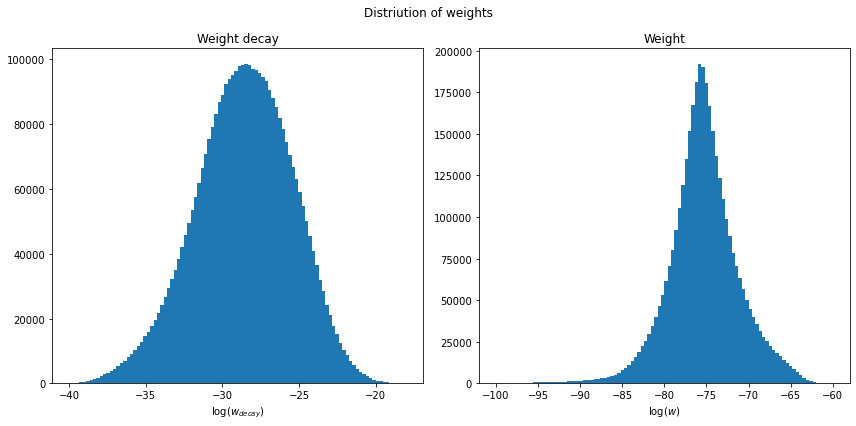

In [19]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle(f'Distriution of weights')
plt.subplot(121)
plt.hist(np.log10(weight_decay_values), range=(-40, -18), bins=100);
plt.xlabel(r'$\log(w_{decay})$')
plt.title('Weight decay')
plt.subplot(122)
plt.hist(np.log10(weight_values), range=(-100, -60), bins=100);
plt.xlabel(r'$\log(w)$')
plt.title('Weight')

plt.tight_layout()
plt.savefig(save_folder + 'weights.png', dpi=250)

# Binned statistics 2d

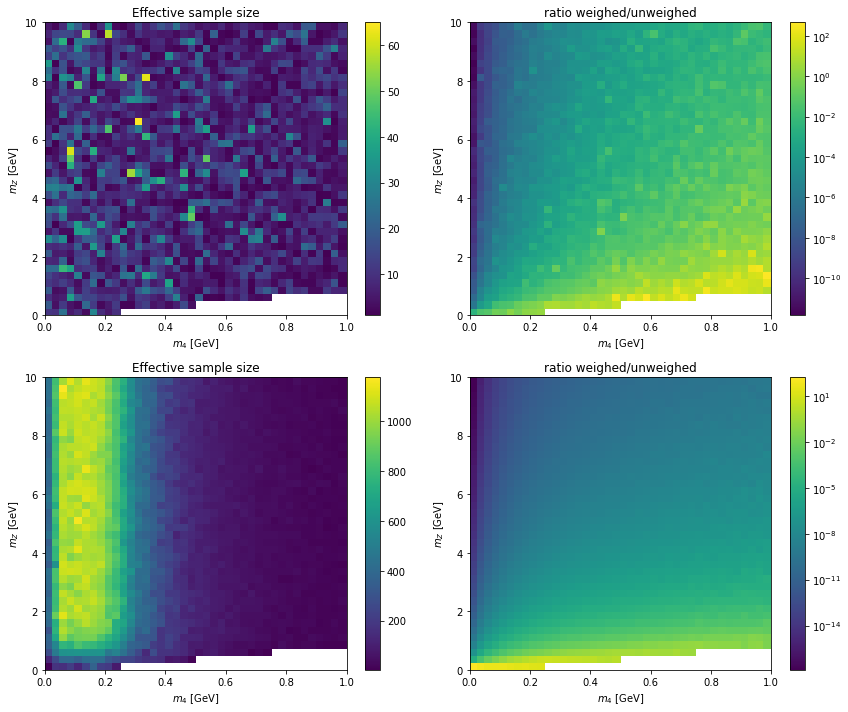

In [22]:
from matplotlib.colors import LogNorm

plt.figure(figsize=[12, 10])
fig.suptitle(f'Samples generated with $\Gamma$ as first integral')

this_bins = (40, 40)
this_range = ((0, 1), (0, 10))
xlabel = r'$m_4$ [GeV]'
ylabel = r'$m_Z$ [GeV]'
plt.subplot(221)
result = binned_statistic_2d(m4_values, mz_values, weight_decay_values, 
                 statistic=effective_sample_size,
                 bins=this_bins, range=this_range)
plt.pcolormesh(result[1], result[2], result[0].T)
plt.colorbar()
plt.title('Effective sample size')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.subplot(222)
result = binned_statistic_2d(m4_values, mz_values, weight_decay_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=this_bins, range=this_range)
plt.pcolormesh(result[1], result[2], result[0].T*len(weight_decay_values)/weight_decay_values.sum(), norm=LogNorm())
plt.colorbar()
plt.title('ratio weighed/unweighed')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# this_bins = (5, 5)

plt.subplot(223)
result = binned_statistic_2d(m4_values, mz_values, weight_values, 
                 statistic=effective_sample_size,
                 bins=this_bins, range=this_range)
plt.pcolormesh(result[1], result[2], result[0].T)
plt.colorbar()
plt.title('Effective sample size')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.subplot(224)
result = binned_statistic_2d(m4_values, mz_values, weight_values, 
                 statistic=ratio_weighted_unweighted,
                 bins=this_bins, range=this_range)
plt.pcolormesh(result[1], result[2], result[0].T*len(weight_values)/weight_values.sum(), norm=LogNorm())
plt.colorbar()
plt.title('ratio weighed/unweighed')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.tight_layout()
plt.savefig(save_folder + f'ess_2d.png', dpi=250)